In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load data
df = pd.read_csv('penumpang.csv', delimiter=';')

In [3]:
# Ubah kolom Fare ke float
df['Fare'] = df['Fare'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)


In [4]:
# Imputasi Age dan Embarked
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12656\1986247198.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [5]:
# Encoding kategori
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])


In [6]:
# Fitur dan target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Prediksi
y_pred = model.predict(X_test)

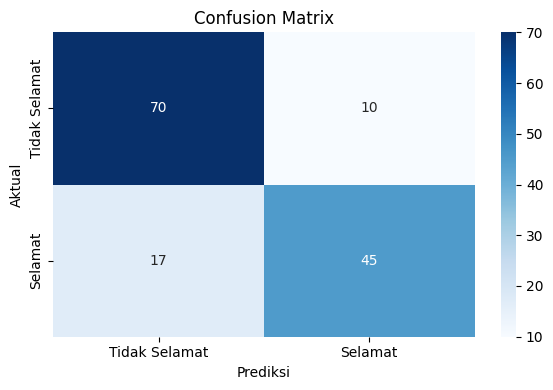

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Selamat', 'Selamat'], yticklabels=['Tidak Selamat', 'Selamat'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [11]:
# Classification Report
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Tidak Selamat', 'Selamat']))

Laporan Klasifikasi:
               precision    recall  f1-score   support

Tidak Selamat       0.80      0.88      0.84        80
      Selamat       0.82      0.73      0.77        62

     accuracy                           0.81       142
    macro avg       0.81      0.80      0.80       142
 weighted avg       0.81      0.81      0.81       142

